### 5. Read a grayscale image and perform the following operations:

        (a) Compare different edge detection algorithms implemented in the spatial domain.

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

### Apply Sobel Filter

In [24]:
def apply_sobelFilter(image):

    # Sobel Kernels
    sobel_vertical_edges_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_horizontal_edges_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply Sobel Filters
    rows, cols = image.shape
    sobel_x = np.zeros_like(image, dtype=np.float64)
    sobel_y = np.zeros_like(image, dtype=np.float64)
    sobelFilteredImage = np.zeros_like(image, dtype=np.uint8)

    for i in range(1, rows - 1):                # Avoid the edges
        for j in range(1, cols - 1):            # Avoid the edges
            patch = image[i-1:i+2, j-1:j+2]     # 3x3 neighborhood
            sobel_x[i, j] = np.sum(patch * sobel_vertical_edges_kernel)
            sobel_y[i, j] = np.sum(patch * sobel_horizontal_edges_kernel)
            magnitude = np.sqrt(sobel_x[i, j]**2 + sobel_y[i, j]**2)

            sobelFilteredImage[i, j] = np.uint8(np.clip(magnitude, 0, 255))

    return sobelFilteredImage

### Apply Laplacian Filter

In [25]:
def apply_laplacianFilter(image):

    # Laplacian Kernel
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    
    # Apply Laplacian Filter
    rows, cols = image.shape
    laplacian_result = np.zeros_like(image, dtype=np.float64)
    laplacianFilteredImage = np.zeros_like(image, dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            patch = image[i-1:i+2, j-1:j+2]
            laplacian_result[i, j] = np.sum(patch * laplacian_kernel)
            laplacianFilteredImage[i, j] = np.uint8(np.clip(np.abs(laplacian_result[i, j]), 0, 255))

    return laplacianFilteredImage

In [26]:
originalImage = cv2.imread("img6.tif", cv2.IMREAD_GRAYSCALE)

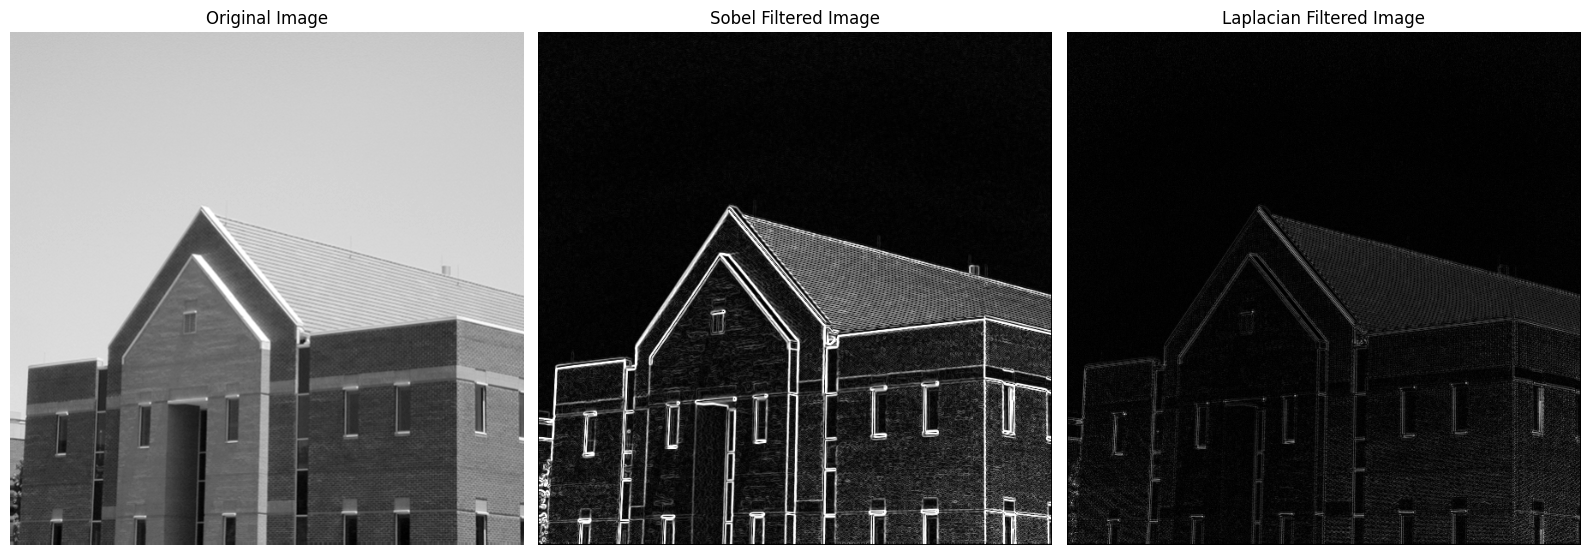

In [28]:
plt.figure(figsize=(16, 12))

# Display Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(originalImage, cmap='gray')
plt.axis('off')
plt.tight_layout()

# Sobel Filtered Image
plt.subplot(1, 3, 2)
plt.title("Sobel Filtered Image")
sobelFilteredImage = apply_sobelFilter(originalImage)
plt.imshow(sobelFilteredImage, cmap='gray')
plt.axis('off')
plt.tight_layout()

# Laplacian Filtered Image
plt.subplot(1, 3, 3)
plt.title("Laplacian Filtered Image")
laplacianFilteredImage = apply_laplacianFilter(originalImage)
plt.imshow(laplacianFilteredImage, cmap='gray')
plt.axis('off')
plt.tight_layout()